In [24]:
"""
Created on Thu Sep 22 13:06:00 2022

# Explorative Data Analysis Workship 1


The instructions in this file assume that you are using Spyder by Anaconda. 
They might be different if you are using Juypler. For example: Jupyler prints
all columns when you use the command df.head(). Syder just prints some columns, 
and it is desirable to use the Variable Explorer instead. 


# Objective:
    1.- Develop a regression algorithm
    2.- Plot residuals and verify distribution.
    3.- Obtain the R-Squared values
    4.- Analyse Influencial Waypoints
    5.- Cook's Distance
    6.- Predict Values
    
@author: Alejandro Murrieta-Mendoza
"""
# 0: Import all your required libreries 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import pandas as pd
import numpy as np

import math

Load the salaries csv

In [25]:
df = pd.read_csv('./../ws1/salaries_clean.csv', index_col=0)

df.head()

,age,salary,add_comp,overall_exp,job_exp,education,gender
0,25-34,51700.0,0.0,5-7 years,5-7 years,Master's degree,Woman
1,25-34,62790.0,4600.0,8 - 10 years,5-7 years,College degree,Non-binary
2,25-34,31960.0,0.0,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,58280.0,2820.0,8 - 10 years,5-7 years,College degree,Woman
4,25-34,56400.0,6580.0,8 - 10 years,5-7 years,College degree,Woman


Let's make a model of overall work experience vs salary. Firstly, let's make a mapping for experience groups to integers.

In [26]:
df['overall_exp'].unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [27]:
mapping = {
    "1 year or less": 0,
    "2 - 4 years": 1,
    "5-7 years": 2,
    "8 - 10 years": 3,
    "11 - 20 years": 4,
    "21 - 30 years": 5,
    "31 - 40 years": 6,
    "41 years or more": 7 
}

df['overall_exp'] = df['overall_exp'].apply(lambda x: mapping[x])

df['overall_exp'].unique()

array([2, 3, 1, 5, 4, 0, 7, 6])

Every experience group is now tied to an integer value, in increasing order.

In [28]:
model = sm.OLS(df['salary'], sm.add_constant(df['overall_exp'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.317
Date:                Thu, 19 Oct 2023   Prob (F-statistic):            0.00393
Time:                        22:54:41   Log-Likelihood:            -4.0382e+05
No. Observations:               27485   AIC:                         8.076e+05
Df Residuals:                   27483   BIC:                         8.077e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.144e+04   9027.961      6.806      0.000    4.37e+04    7.91e+04
overall_exp  7332.0618   2542.323      2.884      0.004    2348.980    1.23e+04
==============================================================================
Omnibus:                   126683.350   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     822768072946.215
Skew:                         162.727   Prob(JB):                         0.00
Kurtosis:                   26804.830   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

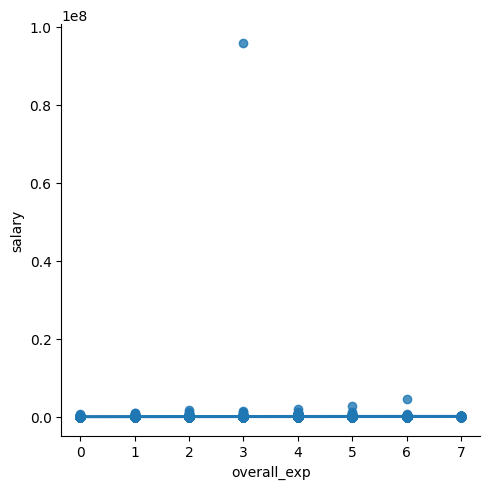

In [29]:
sns.lmplot(data=df, x='overall_exp', y='salary')

Okay, that looks pretty ridiculous... You don't have to be a genius to recognize this is a garbage value, let's cut it out before doing any further analysis.

In [30]:
df = df.drop(df['salary'].nlargest(1).index, axis=0)

In [32]:
model = sm.OLS(df['salary'], sm.add_constant(df['overall_exp'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     764.0
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          6.86e-166
Time:                        22:54:54   Log-Likelihood:            -3.4349e+05
No. Observations:               27484   AIC:                         6.870e+05
Df Residuals:                   27482   BIC:                         6.870e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.633e+04   1006.018     55.991      0.000    5.44e+04    5.83e+04
overall_exp  7830.3690    283.299     27.640      0.000    7275.089    8385.649
==============================================================================
Omnibus:                    61994.984   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1445679093.838
Skew:                          20.847   Prob(JB):                         0.00
Kurtosis:                    1125.800   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

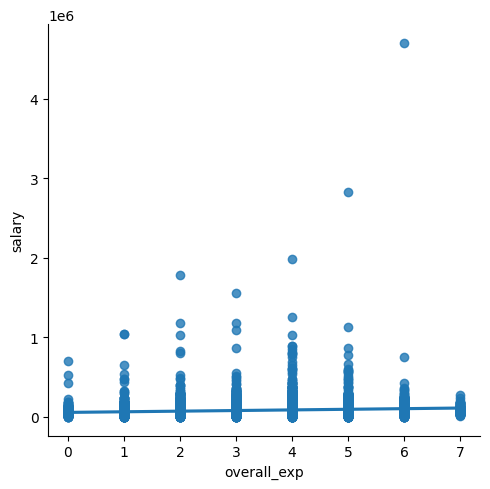

In [33]:
sns.lmplot(data=df, x='overall_exp', y='salary')